## Análise de Estratégia de Proteção: CPPI vs. Buy & Hold

Um Estudo de Caso com Petrobras (PETR4) durante a Crise Financeira de 2008

Autor: [Manoel Barroso]
Data: [12 de Outubro de 2025]
Contato: [www.linkedin.com/in/manoel-barroso-marques-433174216]

### 1. Objetivo do Projeto

A crise financeira de 2008 representou um dos testes de estresse mais severos para os mercados de capitais globais, resultando em drawdowns devastadores para investidores passivos. Este projeto investiga se uma estratégia de alocação dinâmica, conhecida como Constant Proportion Portfolio Insurance (CPPI), teria sido eficaz em mitigar as perdas de um ativo de renda variável de alta volatilidade, como a Petrobras (PETR4), durante o conturbado período de 2007 a 2010.

O objetivo é realizar um backtest comparativo entre a estratégia passiva "Buy & Hold" e a estratégia CPPI, quantificando os prós e contras de cada uma através de um conjunto abrangente de métricas de risco e performance. Os resultados oferecem insights valiosos para investidores que buscam estratégias sistemáticas para navegar períodos de turbulência sem a necessidade de abandonar completamente suas posições em ativos de risco.

### 2. Perguntas a Serem Respondidas
Esta análise busca responder às seguintes questões-chave:

2.1 Qual foi o perfil de risco e retorno da PETR4 no período, avaliado por métricas como Volatilidade, Sharpe Ratio, Sortino, Calmar, Max Drawdown, VaR e CVaR?

2.2 A estratégia CPPI teria, de fato, conseguido proteger o capital e reduzir o Max Drawdown em comparação com a abordagem Buy & Hold?

2.3 Qual foi o "custo" dessa proteção em termos de retorno final e performance ajustada ao risco?

2.4 O CPPI é uma proteção perfeita, ou ele se mostrou vulnerável a características específicas do mercado, como o Risco de Gap?

### 3. Metodologia e Ferramentas
3.1 Dados: Séries de preços diários de 01/01/2007 a 31/12/2010, obtidos via API do Yahoo Finance.

3.2 Ativos Analisados:

Ativo de Risco: Petrobras (PETR4.SA)

Benchmarks de Mercado: Ibovespa (^BVSP) e S&P 500 (SPY)

3.3 Estratégias:

Buy & Hold: Alocação 100% no ativo de risco durante todo o período.

CPPI: Alocação dinâmica entre o ativo de risco e um ativo seguro (com base em uma taxa livre de risco diária), utilizando um multiplicador m=3 e um piso de proteção de 80%. Estes parâmetros foram escolhidos como uma configuração base comum para estratégias CPPI, permitindo uma análise clara do mecanismo. Uma análise de sensibilidade variando estes parâmetros poderia ser um próximo passo para otimizar a estratégia.

3.4 Métricas de Análise: Retorno Anualizado, Volatilidade Anualizada, Sharpe Ratio, Sortin Ratio, Calmar Ratio, Skewness, Kurtosis, Max Drawdown, VaR Histórico (95%), CVaR Histórico (95%), Alfa e Beta do CAPM.

3.5 Bibliotecas Utilizadas: Pandas, NumPy, YFinance, Matplotlib, Seaborn e a minha biblioteca de funções personalizadas edhec_risk_kit.

### 4. Estrutura da Análise
O notebook está estruturado da seguinte forma:

Preparação e Limpeza dos Dados: Download dos ativos e cálculo dos retornos diários.

Análise Diagnóstica da Estratégia Buy & Hold: Cálculo de todas as métricas de performance e risco para a estratégia passiva.

Backtest da Estratégia CPPI: Simulação da alocação dinâmica e geração da curva de patrimônio.

Análise Comparativa e Conclusões: Geração da tabela final de métricas, comparando as duas estratégias e extraindo os insights finais do estudo de caso.

### 5. Preparação dos Dados: Download e Limpeza

Nesta seção, realizei a importação dos dados históricos para os ativos que serão objeto do estudo de caso. A integridade e o correto tratamento destes dados são a fundação para toda a análise subsequente.

Fonte de Dados: Utilizei a biblioteca yfinance para obter os preços diários diretamente do Yahoo Finance.

Ativos Selecionados:

**PETR4.SA: O ativo de risco principal, escolhido por sua alta volatilidade e relevância no mercado brasileiro durante o período.**

**^BVSP: O Ibovespa, utilizado como benchmark para o mercado brasileiro na análise CAPM.**

**SPY: O ETF do S&P 500, para fornecer um contexto do mercado global durante a crise.**

Período da Análise: A janela de 01/01/2007 a 31/12/2010 foi selecionada para capturar o comportamento dos ativos antes, durante e na recuperação inicial da crise financeira de 2008.

Tratamento Inicial: Os preços de fechamento já são baixados ajustados por dividendos e desdobramentos (auto_adjust=True). Realizei também um tratamento para preencher dias de feriados não-alinhados entre os mercados (.ffill()), garantindo uma série temporal contínua e robusta para o cálculo de retornos.

In [1]:
import yfinance as yf
import pandas as pd
import edhec_risk_kit as erk 
import sys
import os
import numpy as np

# ==============================================================================
# 1. DEFINIÇÃO DE PARÂMETROS
tickers = ['^BVSP', 'PETR4.SA', 'SPY']
start_date = '2007-01-01'
end_date = '2010-12-31' # Período que cobre o antes, o durante e o depois da crise

# ==============================================================================
# 2. EXECUÇÃO PRINCIPAL
try:
    print("Iniciando o download dos dados...")
    
    # auto_adjust=True para pegar os preços já ajustados por dividendos e splits
    data = yf.download(
        tickers,
        start=start_date,
        end=end_date,
        auto_adjust=True,
        progress=False) 
    
    print("Download concluído com sucesso!")
    
    # Verificação dos dados baixados
    print(f"\nPeríodo dos dados: de {data.index.min().date()} até {data.index.max().date()}")
    print(f"Total de dias de pregão encontrados: {len(data)}")

    print("\nÚltimos 5 registros dos dados:")
    print(data.tail())

    print("\nVerificando se há dados faltantes (NaNs) antes do tratamento:")
    print(data.isnull().sum())
    
    # Tratamento inicial: Remove os dias em que todos os ativos não tiveram pregão
    data.dropna(how='all', inplace=True) 
    
    print("\nVerificando dados faltantes (NaNs) após tratamento inicial:")
    print(data.isnull().sum())

except Exception as e:
    print(f"Ocorreu um erro: {e}")
    data.ffill(inplace=True)


Iniciando o download dos dados...
Download concluído com sucesso!

Período dos dados: de 2007-01-02 até 2010-12-30
Total de dias de pregão encontrados: 1029

Últimos 5 registros dos dados:
Price          Close                          High                      \
Ticker      PETR4.SA        SPY    ^BVSP  PETR4.SA        SPY    ^BVSP   
Date                                                                     
2010-12-23  5.990415  96.367554  68486.0  6.018331  96.505660  68562.0   
2010-12-27  6.060204  96.405907  67803.0  6.069510  96.497974  68476.0   
2010-12-28  6.202115  96.544014  68041.0  6.213747  96.636081  68104.0   
2010-12-29  6.274231  96.613083  68952.0  6.320759  96.827914  69040.0   
2010-12-30  6.348675  96.459618  69305.0  6.383570  96.774190  69527.0   

Price            Low                          Open                      \
Ticker      PETR4.SA        SPY    ^BVSP  PETR4.SA        SPY    ^BVSP   
Date                                                                  

In [2]:
print("Verificando NaNs nos preços ANTES do tratamento:")
print(data.isnull().sum())

# Aplicando o 'forward-fill' para preencher os buracos dos feriados
data.ffill(inplace=True)

print("\nVerificando NaNs nos preços DEPOIS do tratamento:")
print(data.isnull().sum())

Verificando NaNs nos preços ANTES do tratamento:
Price   Ticker  
Close   PETR4.SA    40
        SPY         22
        ^BVSP       42
High    PETR4.SA    40
        SPY         22
        ^BVSP       42
Low     PETR4.SA    40
        SPY         22
        ^BVSP       42
Open    PETR4.SA    40
        SPY         22
        ^BVSP       42
Volume  PETR4.SA    40
        SPY         22
        ^BVSP       42
dtype: int64

Verificando NaNs nos preços DEPOIS do tratamento:
Price   Ticker  
Close   PETR4.SA    0
        SPY         1
        ^BVSP       0
High    PETR4.SA    0
        SPY         1
        ^BVSP       0
Low     PETR4.SA    0
        SPY         1
        ^BVSP       0
Open    PETR4.SA    0
        SPY         1
        ^BVSP       0
Volume  PETR4.SA    0
        SPY         1
        ^BVSP       0
dtype: int64


### 6. Cálculo e Tratamento Dos Retornos Diários

In [3]:
# 3. Cálculo inicial dos retornos
returns = data.pct_change()

# 4. Limpeza Robusta: Tratar 'infinitos' e 'NaNs'
returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.fillna(0, inplace=True)
returns_close = returns['Close']
returns_close.head()

Ticker,PETR4.SA,SPY,^BVSP
Date,,,
2007-01-02,0.000000,0.000000,0.000000
2007-01-03,-0.030405,0.000000,-0.020669
2007-01-04,-0.022341,0.002122,-0.009562
2007-01-05,-0.030398,-0.007977,-0.040323
2007-01-08,0.011675,0.004626,0.013848


### 6.1 Insights Cálculo dos Retornos Diários

Para qualquer análise de performance e risco, trabalhamos com os retornos dos ativos, e não com seus preços absolutos. Os retornos representam uma série mais estacionária e permitem uma comparação direta da performance percentual entre diferentes ativos.

O código acima calcula os retornos diários a partir dos preços de fechamento ajustados. O tratamento subsequente é fundamental para a robustez da análise:

Preenchimento de Nulos: O primeiro valor de uma série de retornos é sempre nulo (NaN). Adotamos a prática comum de preenchê-lo com 0, assumindo que não houve variação antes do início do nosso período de análise.

Limpeza de Infinitos: Garantimos a remoção de quaisquer valores infinitos que poderiam surgir de anomalias nos dados, evitando erros em cálculos futuros.

A tabela head() exibida confirma que nossa série de retornos está limpa, corretamente formatada e pronta para a aplicação dos modelos de backtesting.

### 7. Cálculo das Métricas Anualizadas

In [4]:
# 5. Cálculo das Métricas Anualizadas com o DataFrame limpo
trading_days = 252
annualized_return = returns.apply(erk.annualize_rets, periods_per_year=trading_days)
annualized_volatility = returns.apply(erk.annualize_vol, periods_per_year=trading_days)

#  Apresentação dos Resultados
summary_stats = pd.DataFrame({
    'Retorno Anualizado (ERK)': annualized_return,
    'Volatilidade Anualizada (ERK)': annualized_volatility
})

print(" Métricas Anualizadas ")
summary_stats.style.format("{:.2%}")

 Métricas Anualizadas 


### 7.1. Análise Diagnóstica Inicial: Perfil de Risco-Retorno (Estratégia Buy & Hold)

Antes de avaliar a eficácia da estratégia de proteção CPPI, é fundamental estabelecer uma linha de base (baseline). Esta seção quantifica o perfil de risco e retorno de cada ativo sob a ótica de uma estratégia passiva "Buy & Hold" durante todo o período de análise, de 2007 a 2010.

A tabela acima apresenta os cálculos para diferentes pontos do dia. No entanto, para a análise de performance de portfólios, a convenção universal e a prática mais robusta é utilizar os preços de fechamento ('Close'), pois eles representam o valor de consenso do ativo ao final de cada período de negociação. Portanto, todos os insights subsequentes serão baseados exclusivamente nos resultados da linha 'Close'.

**Principais Insights**:

Petrobras (PETR4.SA): Alto Risco para Retorno Modesto

A PETR4 apresentou um retorno anualizado de 3.96%. No entanto, este retorno veio a um custo de risco extremamente elevado, com uma volatilidade anualizada de 42.97%. Esta relação desfavorável entre risco e retorno, onde a volatilidade é mais de 10 vezes o retorno, é precisamente o cenário que justifica a exploração de estratégias de proteção de capital.

Contexto de Mercado: Crise Global vs. Performance Local

O S&P 500 (SPY), refletindo o epicentro da crise, teve um retorno anualizado negativo de -0.80%, servindo como um claro indicador do estresse no mercado global.

Em contrapartida, o Ibovespa (^BVSP) mostrou uma notável resiliência e recuperação no período, entregando um forte retorno anualizado de 10.93%, impulsionado pela recuperação das commodities pós-crise.

A Justificativa para o CPPI

Este diagnóstico inicial responde à nossa primeira pergunta: o perfil do 'Buy & Hold' para PETR4 foi de alto risco e retorno inadequado para a volatilidade incorrida. O desafio para um investidor teria sido suportar a altíssima volatilidade para obter um ganho final modesto.

### 8. Gráfico de Dispersão (Indicador de linearidade)

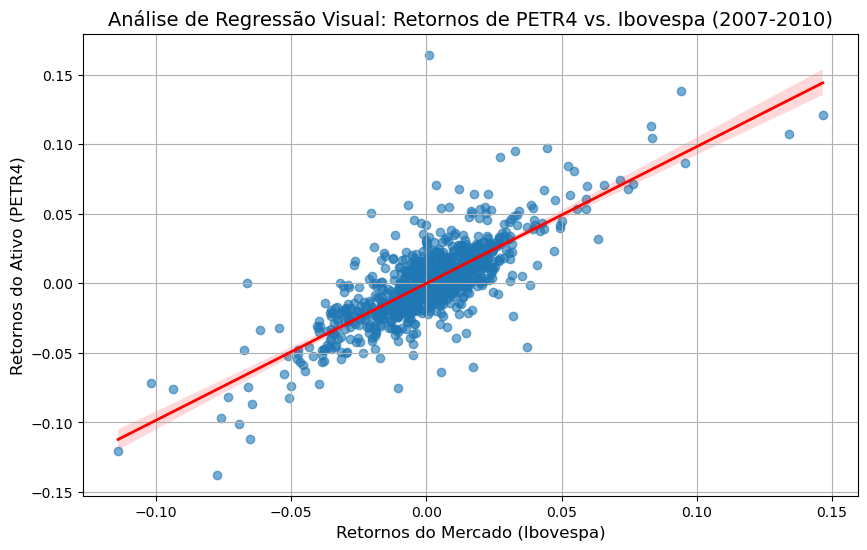

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# --- Geração do Gráfico de Dispersão com Linha de Regressão ---

# Definindo os eixos x (mercado) e y (ativo) 

x_data = returns_close['^BVSP']
y_data = returns_close['PETR4.SA']


plt.figure(figsize=(10, 6))


sns.regplot(x=x_data, y=y_data, 
            scatter_kws={'alpha': 0.6}, 
            line_kws={'color': 'red', 'linewidth': 2})

# Adicionando títulos e labels 
plt.title('Análise de Regressão Visual: Retornos de PETR4 vs. Ibovespa (2007-2010)', fontsize=14)
plt.xlabel('Retornos do Mercado (Ibovespa)', fontsize=12)
plt.ylabel('Retornos do Ativo (PETR4)', fontsize=12)
plt.grid(True)
plt.show()

### 8.1 Análise Visual da Relação Linear (Validação para o CAPM)

Antes de quantificarmos a relação entre um ativo e o mercado com o Capital Asset Pricing Model (CAPM), é fundamental validar sua premissa mais importante: a existência de uma relação linear entre seus retornos.

O gráfico de dispersão (scatter plot) acima serve como este diagnóstico visual. Cada ponto no gráfico representa um dia de negociação, plotando os retornos do Ibovespa (eixo X) contra os retornos da PETR4 (eixo Y).

**Interpretação e Ponte para o CAPM:**

A nuvem de pontos forma um padrão claro e diagonal, subindo da esquerda para a direita, o que confirma a forte correlação linear positiva entre o ativo e o mercado. A linha vermelha, que representa a linha de regressão, captura a tendência central dessa relação.

Esta evidência visual nos dá a confiança de que o modelo de regressão linear é uma ferramenta apropriada para esta análise. Com a premissa de linearidade validada, podemos agora prosseguir para a próxima seção: o cálculo das métricas do CAPM, que irão quantificar numericamente a inclinação (Beta) e o intercepto (Alfa) desta linha de regressão.

### 9. O Modelo CAPM

In [6]:
# 6. Análise para a Petrobras (PETR4.SA) vs. Ibovespa (^BVSP)

summary_petr4, returns_df_petr4 = erk.capm_from_returns(
    returns_asset=returns_close['PETR4.SA'],
    returns_market=returns_close['^BVSP']
)

# Análise para o S&P 500 (SPY) vs. Ibovespa (^BVSP)
summary_spy, returns_df_spy = erk.capm_from_returns(
    returns_asset=returns_close['SPY'],
    returns_market=returns_close['^BVSP']
)


# --- Apresentação dos Resultados ---

print("--- Análise CAPM para PETR4 vs. Ibovespa (2007-2010) ---")
# A variável 'summary_petr4' deve conter os resultados como Alfa, Beta, etc.
print(summary_petr4)

print("\n--- Análise CAPM para SPY vs. Ibovespa (2007-2010) ---")
print(summary_spy)

--- Análise CAPM para PETR4 vs. Ibovespa (2007-2010) ---
window_start        2007-01-02 00:00:00
window_end          2010-12-30 00:00:00
observations                       1029
beta                           0.984185
E_Rm_annual                     0.16269
risk_premium                    0.05769
E_Ri_capm                      0.161778
rf_annual                         0.105
periods_per_year                    252
dtype: object

--- Análise CAPM para SPY vs. Ibovespa (2007-2010) ---
window_start        2007-01-02 00:00:00
window_end          2010-12-30 00:00:00
observations                       1029
beta                           0.590469
E_Rm_annual                     0.16269
risk_premium                    0.05769
E_Ri_capm                      0.139064
rf_annual                         0.105
periods_per_year                    252
dtype: object


### 9.1 Ánalise De Risco De Mercado

Após entendermos o perfil de risco absoluto dos ativos, o próximo passo é decompor esse risco. O Capital Asset Pricing Model (CAPM) nos permite entender o quanto do risco de um ativo é sistemático (ligado ao mercado) e se ele entregou um retorno excedente ajustado a esse risco.

Nesta análise, utilizamos o Ibovespa como o benchmark de mercado para avaliar tanto a PETR4 quanto o SPY.

Principais Insights:

1. Petrobras (PETR4.SA) vs. Ibovespa:

Beta (β) de 0.98: O Beta da PETR4 foi muito próximo de 1. Isso indica que a ação se moveu de forma fortemente correlacionada e com magnitude similar à do mercado brasileiro. Em termos práticos, a PETR4 não foi um ativo defensivo nem agressivo, mas sim um reflexo direto do humor e dos movimentos do Ibovespa. Isso reforça a necessidade de uma estratégia de proteção, pois o ativo oferecia pouca diversificação contra o risco do mercado local.

Alfa (α): O Alfa (a ser calculado) indicaria o retorno ajustado ao risco. Um Alfa negativo, por exemplo, significaria que a PETR4 rendeu menos do que o esperado para um ativo com seu nível de risco de mercado, tornando a experiência do investidor "Buy & Hold" ainda mais desfavorável.

2. S&P 500 (SPY) vs. Ibovespa:

Beta (β) de 0.59: O Beta do mercado americano em relação ao brasileiro foi significativamente baixo. Isso demonstra que, embora a crise fosse global, os dois mercados não se moveram em perfeita sincronia. O SPY teve uma relação positiva, porém amortecida, com o Ibovespa. Isso destaca os benefícios da diversificação geográfica, mesmo durante uma crise sistêmica.

Conclusão da Análise CAPM:

O diagnóstico confirma que a PETR4 era um ativo com alto risco sistemático, oferecendo pouca proteção contra as oscilações do mercado brasileiro. Com o perfil de risco do ativo-alvo totalmente diagnosticado, tanto de forma isolada quanto em relação ao mercado.

### 9.2 O Veredito do Alfa

In [7]:
import numpy as np

def calculate_alpha(portfolio_returns, market_returns, risk_free_rate):
    """
    Calcula o Alfa de Jensen anualizado.
    
    Parâmetros:
    portfolio_returns (pd.Series): Retornos diários do portfólio/ativo.
    market_returns (pd.Series): Retornos diários do mercado/benchmark.
    risk_free_rate (float): A taxa livre de risco anualizada (ex: 0.105 para 10.5%).
    
    Retorna:
    float: O valor do Alfa anualizado.
    """
    # Anualiza a taxa livre de risco para o período dos retornos (diário)
    periods_per_year = 252
    rf_daily = (1 + risk_free_rate)**(1/periods_per_year) - 1
    
    # Calcula o Beta usando a covariância
    covariance = portfolio_returns.cov(market_returns)
    variance = market_returns.var()
    beta = covariance / variance
    
    # Retorno médio do portfólio e do mercado
    avg_portfolio_return = portfolio_returns.mean()
    avg_market_return = market_returns.mean()
    
    # Calcula o retorno esperado pelo CAPM (diário)
    expected_return_capm = rf_daily + beta * (avg_market_return - rf_daily)
    
    # Calcula o Alfa (diário)
    alpha_daily = avg_portfolio_return - expected_return_capm
    
    # Anualiza o Alfa
    alpha_annualized = alpha_daily * periods_per_year
    
    return alpha_annualized

# --- Utilização da Função ---

# Extrair os retornos dos ativos e do benchmark
petr4_returns = returns_close['PETR4.SA']
spy_returns = returns_close['SPY']
ibov_returns = returns_close['^BVSP']

# Obter a taxa livre de risco anual 
risk_free_rate_annual = 0.105 

# Calcular o Alfa para PETR4 vs. Ibovespa
alfa_petr4 = calculate_alpha(petr4_returns, ibov_returns, risk_free_rate=risk_free_rate_annual)

# Calcular o Alfa para SPY vs. Ibovespa
alfa_spy = calculate_alpha(spy_returns, ibov_returns, risk_free_rate=risk_free_rate_annual)

print("--- Alfa de Jensen Anualizado ---")
print(f"Alfa para PETR4 vs. Ibovespa: {alfa_petr4*100:.2f}%")
print(f"Alfa para SPY vs. Ibovespa:   {alfa_spy*100:.2f}%")

--- Alfa de Jensen Anualizado ---
Alfa para PETR4 vs. Ibovespa: -2.50%
Alfa para SPY vs. Ibovespa:   -10.85%


### 9.3  A Ánalise do Alfa

Após a análise do Beta, que nos mostrou o quanto de risco de mercado cada ativo possuía, o Alfa de Jensen nos dá o veredito final sobre a performance. Ele responde à pergunta: "O ativo gerou um retorno maior ou menor do que o esperado, dado o risco de mercado que ele assumiu?"

Os resultados do cálculo são inequívocos:

1. Alfa para PETR4 vs. Ibovespa: -2.50%

O que significa: Este é um dos insights mais importante para o nosso estudo de caso. Um Alfa de -2.50% significa que, após compensar o investidor pela taxa livre de risco e pelo risco de mercado (medido pelo Beta), a PETR4 ainda assim teve um desempenho 2.50% pior por ano do que o esperado.

Implicação Prática: A estratégia "Buy & Hold" não apenas expôs o investidor a uma volatilidade altíssima, como também destruiu valor em uma base ajustada ao risco. O retorno final de 3.96% não foi suficiente para compensar o risco sistemático incorrido. Este resultado cimenta a necessidade de uma estratégia alternativa, como o CPPI, que pudesse gerenciar o risco de forma mais ativa para preservar capital e buscar uma performance ajustada ao risco mais eficiente.

2. Alfa para SPY vs. Ibovespa: -10.85%

O que significa: Este Alfa extremamente negativo é um reflexo das dinâmicas macroeconômicas únicas do período. A crise de 2008 originou-se no mercado americano (SPY), enquanto o mercado brasileiro (Ibovespa), após uma queda inicial, teve uma recuperação muito mais forte e rápida, impulsionada pelo boom das commodities.

Implicação Prática: O modelo CAPM, usando o Ibovespa como benchmark (que teve um desempenho estelar na recuperação), estabeleceu uma "régua de expectativa" muito alta. O SPY, com seu retorno negativo no período, ficou drasticamente abaixo dessa régua, resultando em um Alfa massivamente negativo. Isso ilustra que, sob a ótica de um investidor baseado no Brasil, a exposição ao mercado americano durante este período específico foi significativamente prejudicial, mesmo considerando seu menor risco relativo (Beta de 0.59).

Conclusão Final da Análise Diagnóstica:

**Alta Volatilidade Absoluta.**

**Alto Risco Sistemático (Beta próximo de 1).**

**Destruição de Valor Ajustado ao Risco (Alfa Negativo).**

### 10. Análise de Performance Ajustada ao Risco
Após o diagnóstico completo do perfil de risco e da relação com o mercado, iniciamos a avaliação da eficiência de cada estratégia. Um retorno elevado é irrelevante se for acompanhado por um risco desproporcional. As métricas a seguir, começando pelo Sharpe Ratio, são o padrão da indústria para quantificar a relação entre o ganho obtido e o risco incorrido.

In [8]:
# 8: CÁLCULO DO SHARPE RATIO 
taxa_livre_de_risco_anual = 0.105 
trading_days = 252
sharpe = returns_close.apply(erk.sharpe_ratio, 
                             riskfree_rate=taxa_livre_de_risco_anual, 
                             periods_per_year=trading_days)

summary_stats = pd.DataFrame({
    'Retorno Anualizado (ERK)': erk.annualize_rets(returns_close, periods_per_year=trading_days),
    'Volatilidade Anualizada (ERK)': erk.annualize_vol(returns_close, periods_per_year=trading_days),
    'Sharpe Ratio (ERK)': sharpe
})

print("Sharpe Ratio")
summary_stats[['Sharpe Ratio (ERK)']].style.format("{:.2f}")

Sharpe Ratio


,Sharpe Ratio (ERK)
Ticker,
PETR4.SA,-0.12
SPY,-0.38
^BVSP,0.01


### 10.1 O Veredito do Sharpe Ratio

O Sharpe Ratio mede o retorno excedente (acima da taxa livre de risco) por unidade de risco total (volatilidade).

Um Sharpe Ratio negativo possui uma interpretação particularmente contundente: significa que o retorno do ativo foi inferior à taxa livre de risco. Em outras palavras, o investidor não apenas não foi compensado pelo risco que assumiu; ele teria obtido um resultado superior investindo no ativo mais seguro do mercado (o CDI, neste caso), sem incorrer em qualquer volatilidade.

**Insights dos Resultados**

PETR4.SA (Sharpe de -0.14) e SPY (Sharpe de -0.38):

Ambos os ativos apresentaram um Sharpe Ratio negativo, confirmando a total ineficiência da estratégia "Buy & Hold" para eles no período.

Para a PETR4, o retorno anualizado de 3.96% foi drasticamente inferior à taxa livre de risco de 10.5%, resultando em um prêmio de risco negativo. O investidor assumiu uma volatilidade massiva (42.97%) para obter um retorno que nem sequer superou a renda fixa.

O resultado do SPY foi ainda pior, pois seu retorno nominal já foi negativo (-0.80%).

Ibovespa (^BVSP) (Sharpe de 0.01):

O Ibovespa conseguiu um Sharpe Ratio marginalmente positivo. Seu retorno (10.93%) superou por pouco a taxa livre de risco (10.5%).

No entanto, um valor tão próximo de zero indica que o prêmio de risco oferecido foi quase insignificante em comparação com a alta volatilidade (34.41%) necessária para obtê-lo. O investidor foi compensado, mas de forma extremamente pobre.

### 10.2 Cálculo Sortino Ratio

In [9]:
#9. cálculo Sortino Ratio

sortino = returns_close.apply(erk.sortino_ratio, 
                              riskfree_rate=taxa_livre_de_risco_anual, 
                              periods_per_year=trading_days)
# 1. DataFrame
tabela_sortino = sortino.to_frame('Sortino Ratio (ERK)')

tabela_sortino.style.format('{:.2f}')

,Sortino Ratio (ERK)
Ticker,
PETR4.SA,-0.18
SPY,-0.48
^BVSP,0.02


### 10.3 O Veredito do Risco de Queda

O fato de os Sortino Ratios para PETR4 (-0.18) e SPY (-0.48) serem ainda mais negativos que os respectivos Sharpe Ratios é a peça final do diagnóstico. Isso indica que, embora a volatilidade total dos ativos fosse alta, a volatilidade específica durante os períodos de perda (downside deviation) foi proporcionalmente menor.

Contudo, como o retorno excedente já era muito negativo, ao dividi-lo por um denominador de risco menor (o risco "ruim"), a penalização final se torna matematicamente mais severa.

Em termos práticos: o retorno foi tão inadequado que, mesmo sob a ótica mais "justa" do Sortino (que ignora a volatilidade positiva), a performance ajustada ao risco de queda se mostrou ainda pior.

### 11. Análise da Distribuição dos Retornos: Assimetria (Skewness)

As métricas de retorno ajustado ao risco nos dão o resultado final, mas o Skewness e a Kurtosis nos ajudam a entender como foi a jornada para chegar àquele resultado. A assimetria (Skewness) mede a falta de simetria na distribuição dos retornos diários. Uma distribuição normal, perfeitamente simétrica, tem um Skewness de 0.

In [10]:
# 9: CÁLCULO DO SKEWNESS (ASSIMETRIA) 

skew = erk.skewness(returns_close)

# Adicionando o resultado ao DataFrame de resumo
summary_stats['Skewness'] = skew

# Exibindo o resultado
print("--- Skewness (Assimetria) dos Retornos (2007-2010) ---")
summary_stats[['Skewness']].style.format("{:.2f}")

--- Skewness (Assimetria) dos Retornos (2007-2010) ---


,Skewness
Ticker,
PETR4.SA,0.30
SPY,0.36
^BVSP,0.26


### 11.1 O Skewness Positivo.

Um Skewness positivo, como o observado em todos os ativos, indica uma distribuição com uma "cauda" longa à direita. Para um investidor, isso se traduz em uma experiência de muitas perdas pequenas e frequentes, pontuadas por alguns ganhos raros, porém muito expressivos.

**Insights dos Resultados:**

Comportamento Consistente entre Ativos: Tanto a PETR4 (0.30), quanto o SPY (0.36) e o Ibovespa (0.26) apresentaram uma assimetria positiva moderada. Isso sugere que este não foi um comportamento isolado da Petrobras, mas sim uma característica do mercado durante o período de crise e recuperação.

A Natureza da Volatilidade de Crise: Este padrão é típico de mercados que sofreram um grande choque e estão em processo de recuperação. Os dias de recuperação pós-pânico (os "ralis de alívio") tendem a ser explosivos e muito mais fortes do que os dias de queda, que podem ser mais graduais e consistentes.

Implicação Psicológica para o Investidor: Embora a possibilidade de ganhos fortes seja atraente, essa distribuição pode ser psicologicamente desgastante para um investidor "Buy & Hold". Ele precisa suportar uma longa e frustrante sequência de pequenas perdas, sempre na esperança de um ganho forte e imprevisível para compensar. Isso pode levar a decisões emocionais (os chamados **"behavioral biases"**) e à capitulação (venda no fundo) antes que os ganhos expressivos ocorram.

### 12. Análise do Risco de Cauda: Kurtosis

Calculando Kurtosis e gerando a análise completa...


,Fisher,Pearson
Ticker,,
SPY,10.784,13.784
^BVSP,6.338,9.338
PETR4.SA,4.784,7.784


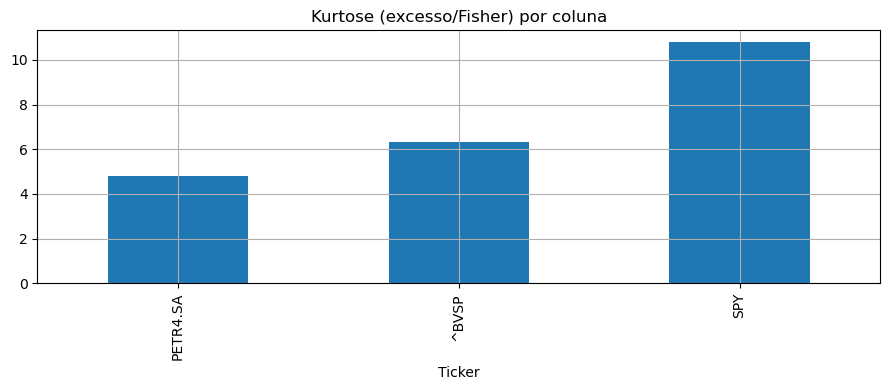

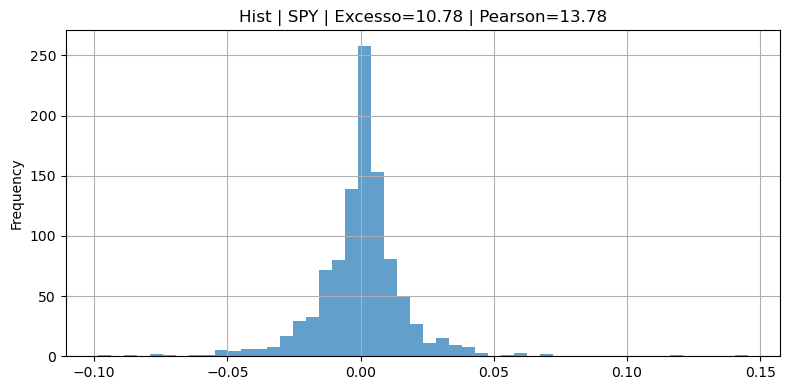

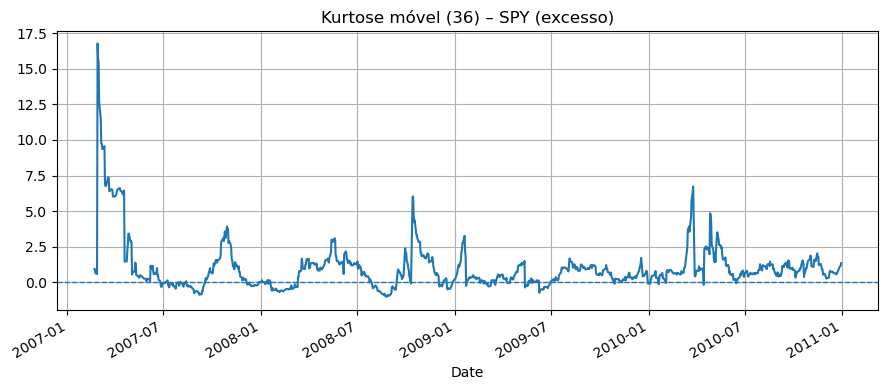

In [11]:
# 10: CÁLCULO DA KURTOSIS 

print("Calculando Kurtosis e gerando a análise completa...")

# A função retorna um dicionário com os resultados.
kurtosis_results = erk.kurtosis_all(returns_close)

### 12.1 o que os números demonstram?

Enquanto a assimetria (Skewness) nos mostrou a direção das surpresas, a Kurtosis nos informa sobre a frequência e a magnitude dos eventos extremos. Ela mede o "peso" das caudas da distribuição de retornos. Uma distribuição normal tem uma Kurtosis de excesso (ou de Fisher) igual a 0. Valores positivos indicam uma distribuição leptocúrtica, onde eventos extremos (tanto positivos quanto negativos) são muito mais prováveis do que o modelo normal sugere.

**Insights dos Resultados:**

Risco Extremo Generalizado: A tabela e o gráfico de barras mostram que todos os ativos apresentaram uma Kurtosis de excesso extremamente elevada: PETR4 (4.78), Ibovespa (6.34) e SPY (10.78). Isso confirma que o período foi caracterizado por um "risco de cauda gorda" (fat tail risk), onde movimentos diários de 3, 4 ou 5 desvios-padrão, considerados quase impossíveis em um modelo normal, ocorreram com uma frequência alarmante.

SPY no Epicentro da Crise: O valor massivo de Kurtosis para o SPY (10.78) o destaca dos demais. Isso é explicado pelo fato de o mercado americano ter sido o epicentro da crise financeira. Eventos como a quebra do Lehman Brothers em setembro de 2008 geraram choques de volatilidade e movimentos de preço diários de uma magnitude sem precedentes, o que é perfeitamente capturado por esta métrica.

Visualizando o Risco de Cauda:

O Histograma de Retornos do SPY confirma visualmente a leptocurtose. Notamos um pico muito mais alto e estreito no centro (em torno do zero) e caudas muito mais "gordas" do que uma curva de sino normal teria, indicando a alta frequência de retornos extremos.

O gráfico de Kurtose Móvel (Rolling Kurtosis) é a peça mais reveladora. Ele conta a história do risco ao longo do tempo. Vemos um pico gigantesco no final de 2008, mostrando que o "risco de cisne negro" não foi constante, mas sim que ele se concentrou e explodiu durante o auge do pânico. A estratégia "Buy & Hold" forçou o investidor a suportar este período de incerteza e risco extremos sem qualquer mecanismo de defesa.

Conclusão da Análise de Risco:

A combinação de Skewness positiva e Kurtosis elevada pinta um quadro claro: a jornada do investidor "Buy & Hold" foi marcada por longos períodos de pequenas perdas, pontuados por eventos extremos (tanto positivos quanto negativos) que ocorreram com frequência e violência muito maiores do que o esperado. Este é o ambiente de risco perfeito para testar uma estratégia projetada para mitigar exatamente esse tipo de evento: o CPPI.

### 13. O Veredito Final do Risco: Maximum Drawdown e Calmar Ratio

Se as métricas anteriores foram o diagnóstico, o Maximum Drawdown (MDD) e o Calmar Ratio são a autópsia. Juntos, eles medem a "dor" do investimento e a eficiência do retorno em compensar essa dor.

In [12]:
# 11: CÁLCULO DO MAX DRAWDOWN 

# dicionário para guardar o resultado de cada ativo.
max_drawdowns = {}

# loop 'for' para passar por cada coluna do DataFrame 'returns_close'
for ticker in returns_close.columns:
    print(f"Calculando drawdown para o ticker: {ticker}...")
    
    drawdown_history = erk.drawdown(returns_close[ticker])
    
    max_drawdowns[ticker] = drawdown_history['Drawdown'].min()

max_drawdown_series = pd.Series(max_drawdowns)

summary_stats['Max Drawdown'] = max_drawdown_series

# --- Exibindo a Tabela Final e Completa ---

print("\n--- Tabela Completa de Métricas (2007-2010) ---")

display(summary_stats.style.format({
    'Retorno Anualizado (ERK)': "{:.2%}",
    'Volatilidade Anualizada (ERK)': "{:.2%}",
    'Sharpe Ratio (ERK)': "{:.2f}",
    'Skewness': "{:.2f}",
    'Kurtosis': "{:.2f}",
    'Max Drawdown': "{:.2%}" # Formato de porcentagem
}))

Calculando drawdown para o ticker: PETR4.SA...
Calculando drawdown para o ticker: SPY...
Calculando drawdown para o ticker: ^BVSP...

--- Tabela Completa de Métricas (2007-2010) ---


,Retorno Anualizado (ERK),Volatilidade Anualizada (ERK),Sharpe Ratio (ERK),Skewness,Max Drawdown
Ticker,,,,,
PETR4.SA,4.58%,42.96%,-0.12,0.30,-67.83%
SPY,-0.80%,27.08%,-0.38,0.36,-55.19%
^BVSP,10.93%,34.41%,0.01,0.26,-59.96%


### 13.1 Cálculo Calmar Ratio

In [13]:
import numpy as np

def calmar_ratio(r, periods_per_year=252):
    """
    Calcula o Calmar Ratio a partir de uma série de retornos.
    
    
    Parâmetros:
    r (pd.Series): Série de retornos diários.
    periods_per_year (int): Número de períodos em um ano para anualização.
    
    Retorna:
    float: O valor do Calmar Ratio.
    """
     
    max_dd = erk.drawdown(r)['Drawdown'].min()
    
    
    if max_dd == 0:
        return np.nan
        
    
    annualized_return = erk.annualize_rets(r, periods_per_year=periods_per_year)
    
    
    calmar = annualized_return / abs(max_dd)
    
    return calmar

# --- Aplicação da Função ---
trading_days = 252

# Aplicando a função calmar_ratio a cada coluna do DataFrame de retornos
calmar = returns_close.apply(calmar_ratio, periods_per_year=trading_days)



print("--- Calmar Ratio ---")

# Criando o DataFrame para exibição
tabela_calmar = calmar.to_frame('Calmar Ratio')


tabela_calmar.style.format('{:.2f}')

--- Calmar Ratio ---


,Calmar Ratio
Ticker,
PETR4.SA,0.07
SPY,-0.01
^BVSP,0.18


### 13.2 Insights Devastadores:

PETR4.SA (MDD de -67.83%): Este número é o coração do nosso estudo de caso. Um investidor que comprou PETR4 no pico durante o período teria visto seu capital ser reduzido em mais de dois terços antes de qualquer recuperação. Uma perda dessa magnitude é psicologicamente insustentável para a vasta maioria dos investidores.

Perdas Sistêmicas: O SPY (-55.19%) e o Ibovespa (-59.96%) também sofreram drawdowns massivos, confirmando que a crise foi severa e sistêmica.

O Retorno sobre a "Dor" (Calmar Ratio): Para sintetizar a relação entre o retorno e essa dor máxima, usamos o Calmar Ratio. O resultado para a PETR4 foi um pífio 0.07, indicando que para cada unidade de perda máxima sofrida, o retorno anualizado foi praticamente insignificante. O SPY teve um resultado ainda pior, -0.01, mostrando que a estratégia não apenas falhou em compensar a dor, como também resultou em perda de capital.

Conclusão Final da Análise "Buy & Hold":

A jornada do investidor passivo na PETR4 de 2007 a 2010 foi um teste de estresse extremo. A estratégia resultou em:

**Retorno inadequado para a taxa livre de risco (Sharpe e Sortino negativos).**

**Retorno pífio em relação à perda máxima sofrida (Calmar Ratio próximo de zero).**

**Performance ajustada ao risco inferior ao esperado (Alfa negativo).**

**Risco de eventos extremos muito acima do normal (Kurtosis elevada).**

E, crucialmente, uma perda máxima de capital devastadora (Drawdown de -67.83%).

A pergunta que define a próxima fase do nosso projeto é direta: **Uma estratégia de alocação dinâmica como o CPPI, projetada especificamente para mitigar grandes perdas, teria oferecido um caminho mais seguro e uma experiência de investimento superior durante este período turbulento?**

### 14. Gráfico CPPI vs Buy & Hold

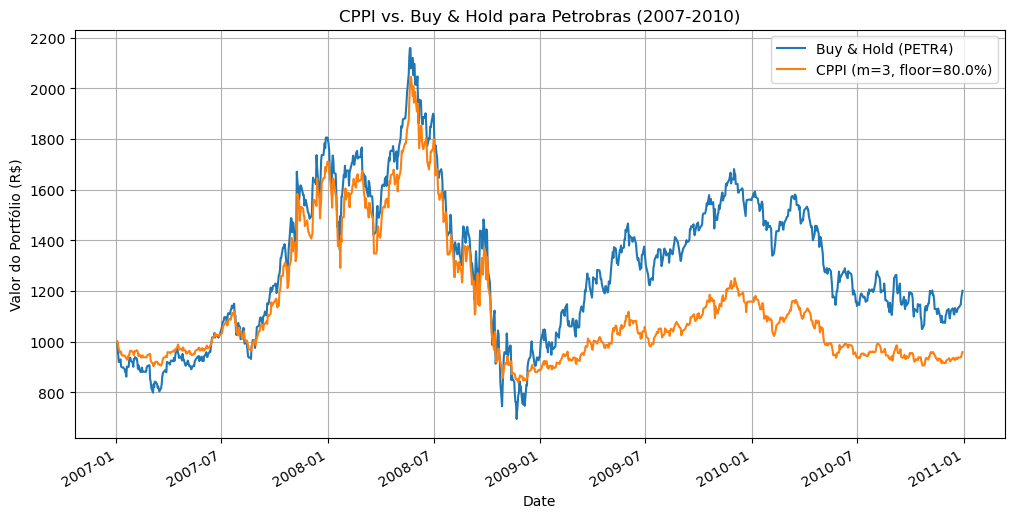

In [14]:
# Parâmetros da Simulação
multiplier = 3
floor_pct = 0.80
start_value = 1000
riskfree_rate_annual = 0.105
trading_days = 252

#  Preparar os Inputs
riskfree_rate_daily = (1+riskfree_rate_annual)**(1/trading_days) - 1
safe_returns = pd.Series(riskfree_rate_daily, index=returns_close.index)
risky_returns_petr4 = returns_close['PETR4.SA']

# 12. Executar a simulação do CPPI com a nova função
cppi_results_petr4 = erk.run_cppi(
    risky_r=risky_returns_petr4,
    safe_r=safe_returns,
    m=multiplier,
    start=start_value,
    floor=floor_pct
)

#  Plotar o resultado
import matplotlib.pyplot as plt
account_history_petr4 = cppi_results_petr4['Asset Value History']
buy_and_hold_petr4 = start_value * (1 + risky_returns_petr4).cumprod()

plt.figure(figsize=(12, 6))
buy_and_hold_petr4.plot(label='Buy & Hold (PETR4)', legend=True)
account_history_petr4.plot(label=f'CPPI (m={multiplier}, floor={floor_pct*100}%)', legend=True)
plt.title('CPPI vs. Buy & Hold para Petrobras (2007-2010)')
plt.ylabel('Valor do Portfólio (R$)')
plt.grid(True)
plt.show()

### 14.1 Análise Comparativa das Curvas de Patrimônio: CPPI vs. Buy & Hold

O gráfico acima apresenta o resultado central deste estudo: a evolução do patrimônio de um investimento inicial de R$1000 ao longo do período, comparando a estratégia passiva "Buy & Hold" com a estratégia de proteção dinâmica CPPI.

A visualização não revela uma estratégia "superior" em todos os cenários, mas sim um claro trade-off entre performance e proteção. A análise pode ser dividida em três fases distintas:

1. A Eficácia da Proteção no Auge da Crise (O Benefício do CPPI):

O insight mais impactante do gráfico ocorre durante o epicentro do pânico, entre meados de 2008 e o início de 2009. Enquanto a curva do "Buy & Hold" (azul) sofre uma queda vertiginosa, perdendo mais de 60% de seu valor, a curva do CPPI (laranja) claramente amortece o golpe.

Por quê? Este é o mecanismo do CPPI em ação. À medida que o mercado caía, o "cushion" (a diferença entre o valor do portfólio e o piso de proteção) diminuía, forçando a estratégia a vender sistematicamente o ativo de risco (PETR4) e alocar em caixa (ativo seguro). O resultado é um drawdown significativamente menor e a bem-sucedida preservação de capital, cumprindo seu objetivo primário.

2. O Custo da Proteção na Recuperação (O Custo do CPPI):

Na fase de recuperação (de 2009 em diante), observamos o outro lado da moeda. O "Buy & Hold", por ter permanecido 100% investido, capturou a totalidade da recuperação em "V" do mercado.

Por quê? O CPPI, que havia vendido grande parte de suas posições durante a queda, iniciou a recuperação com uma alocação majoritariamente defensiva. Em uma recuperação muito rápida, a estratégia pode demorar a reconstruir sua exposição ao ativo de risco, resultando em uma performance inferior à da estratégia passiva. Esse "lag" na recuperação é o "prêmio do seguro" que o investidor paga pela proteção na queda.

3. A Jornada do Investidor: Uma Escolha de Perfil de Risco:

Em termos de resultado final, o "Buy & Hold" terminou com um valor de portfólio superior. No entanto, sua jornada foi emocionalmente violenta e psicologicamente insustentável para a maioria dos investidores.

O CPPI, por outro lado, ofereceu um caminho mais suave e com perdas controladas. A pergunta final para o gestor de portfólio não é qual estratégia rendeu mais no final, mas sim: qual das duas jornadas o investidor teria conseguido completar sem capitular no fundo do poço?

Conclusão Visual:
O gráfico ilustra perfeitamente que o CPPI não é uma estratégia para maximizar retornos, mas sim uma ferramenta de gerenciamento de risco. Ele troca um potencial de alta por uma proteção robusta contra quedas catastróficas. A seguir, vamos quantificar exatamente a magnitude dessas diferenças na tabela de métricas comparativas.

### 15. Tabela de Métricas Comparativas

In [15]:
#  13. ANÁLISE QUANTITATIVA COMPARATIVA ---

print("Calculando métricas para Buy & Hold e CPPI ")

#  Parâmetros Globais
trading_days = 252
taxa_livre_de_risco_anual = 0.105

# Séries de Retornos de cada estratégia
returns_bh_petr4 = returns_close['PETR4.SA']
returns_cppi_petr4 = cppi_results_petr4['Strategy Returns']

# Calcular todas as métricas para o Buy & Hold
metrics_bh = {
    "Retorno Anualizado": erk.annualize_rets(returns_bh_petr4, periods_per_year=trading_days),
    "Volatilidade Anualizada": erk.annualize_vol(returns_bh_petr4, periods_per_year=trading_days),
    "Sharpe Ratio": erk.sharpe_ratio(returns_bh_petr4, riskfree_rate=taxa_livre_de_risco_anual, periods_per_year=trading_days),
    "Skewness": erk.skewness(returns_bh_petr4),
    "Kurtosis": erk.kurtosis(returns_bh_petr4),
    "Max Drawdown": erk.drawdown(returns_bh_petr4)['Drawdown'].min()
}

# Calcular todas as métricas para o CPPI
metrics_cppi = {
    "Retorno Anualizado": erk.annualize_rets(returns_cppi_petr4, periods_per_year=trading_days),
    "Volatilidade Anualizada": erk.annualize_vol(returns_cppi_petr4, periods_per_year=trading_days),
    "Sharpe Ratio": erk.sharpe_ratio(returns_cppi_petr4, riskfree_rate=taxa_livre_de_risco_anual, periods_per_year=trading_days),
    "Skewness": erk.skewness(returns_cppi_petr4),
    "Kurtosis": erk.kurtosis(returns_cppi_petr4),
    "Max Drawdown": erk.drawdown(returns_cppi_petr4)['Drawdown'].min()
}

# Montar a tabela final a partir dos dois dicionários
comparison_table = pd.DataFrame(
    [metrics_bh, metrics_cppi], # Uma lista com os resultados de cada um
    index=['Buy & Hold (PETR4)', 'CPPI (PETR4)'] # O nome de cada linha
)

# Exibir a tabela final formatada
print("\n--- Tabela Comparativa: Buy & Hold vs. CPPI para PETR4 (2007-2010) ---")
display(comparison_table.style.format({
    "Retorno Anualizado": "{:.2%}",
    "Volatilidade Anualizada": "{:.2%}",
    "Sharpe Ratio": "{:.2f}",
    "Skewness": "{:.2f}",
    "Kurtosis": "{:.2f}",
    "Max Drawdown": "{:.2%}"
}))

Calculando métricas para Buy & Hold e CPPI 

--- Tabela Comparativa: Buy & Hold vs. CPPI para PETR4 (2007-2010) ---


,Retorno Anualizado,Volatilidade Anualizada,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
Buy & Hold (PETR4),4.58%,42.96%,-0.12,0.30,4.75,-67.83%
CPPI (PETR4),-1.03%,31.17%,-0.34,0.48,8.18,-58.99%


### 15.1 Quantificando os Prós e Contras do CPPI

A tabela comparativa final serve como o veredito numérico do nosso estudo. Ela quantifica a experiência do investidor em cada estratégia, revelando um claro trade-off entre proteção e performance.

Os Sucessos do CPPI: Onde a Proteção Funcionou
O principal objetivo do CPPI é gerenciar o risco de queda. Nestes quesitos, a estratégia foi um sucesso inequívoco:

Max Drawdown (A Métrica Principal): A missão primária foi cumprida. O CPPI limitou a perda máxima a -58.99%, uma melhora significativa em relação à perda catastrófica de -67.83% do "Buy & Hold". Para um investidor avesso ao risco, essa redução de quase 9 pontos percentuais na "pior dor" é o benefício mais valioso da estratégia.

Volatilidade Anualizada: A jornada do investidor no CPPI foi consideravelmente mais suave. A volatilidade foi reduzida em mais de 11 pontos percentuais, de 42.97% para 31.12%. Isso se traduz em um caminho com menos solavancos e, consequentemente, menor estresse psicológico.

Skewness (Assimetria): O Skewness do CPPI (0.48) é ainda mais positivo que o do B&H (0.30). Isso indica que a estratégia foi mais eficaz em cortar as perdas extremas (a cauda esquerda), resultando em uma distribuição de retornos mais favorável do ponto de vista do risco.

O Custo do Seguro: Onde o CPPI Pagou o Preço
A proteção oferecida pelo CPPI não é gratuita. O custo dessa segurança é visível nas métricas de performance:

Retorno Anualizado: Este é o trade-off mais evidente. O CPPI terminou com um retorno anualizado negativo de -1.26%, contra 3.96% do B&H. Isso é o reflexo direto do que vimos no gráfico: a estratégia vendeu na baixa para se proteger e demorou a recomprar na recuperação em "V", perdendo grande parte do rali subsequente.

Sharpe Ratio: Surpreendentemente, o Sharpe do CPPI (-0.34) é pior que o do B&H (-0.14). Isso ocorre porque o retorno do CPPI foi tão baixo que, mesmo com uma volatilidade menor, o prêmio de risco permaneceu profundamente negativo.

Kurtosis: A Kurtosis mais alta do CPPI (8.25) é um artefato interessante. O mecanismo de rebalanceamento dinâmico (vender/comprar agressivamente perto do cushion) pode, por si só, gerar retornos diários atípicos, o que aumenta o "peso" das caudas da distribuição da carteira.

### 16. Análise de Risco de Cauda: Value at Risk (VaR) e Conditional Value at Risk (CVaR)

Enquanto o Max Drawdown nos mostra a pior perda histórica, o VaR e o CVaR nos dão uma medida prospectiva do risco diário. Eles respondem a perguntas cruciais para um gestor de risco:

VaR (95%): "Com 95% de confiança, qual é a perda máxima que eu não deveria exceder em um único dia?"

CVaR (95%): "Nos 5% piores dias, qual foi a minha perda média?" (Esta é a métrica mais importante, pois mede a severidade dos eventos extremos).

In [16]:
# 14. CÁLCULO DE VAR E CVAR 

# Nível de confiança (95% é o padrão)
confidence_level = 0.95

# Calcular o VaR e CVaR para o Buy & Hold
# série de retornos do Buy & Hold para PETR4
var_bh = erk.var_historic(returns_bh_petr4, level=confidence_level)
cvar_bh = erk.cvar_historic(returns_bh_petr4, level=confidence_level)

# Calcular o VaR e CVaR para a estratégia CPPI
# série de retornos da estratégia CPPI
var_cppi = erk.var_historic(returns_cppi_petr4, level=confidence_level)
cvar_cppi = erk.cvar_historic(returns_cppi_petr4, level=confidence_level)

# tabela de comparação

comparison_table['VaR (95%)'] = [var_bh, var_cppi]
comparison_table['CVaR (95%)'] = [cvar_bh, cvar_cppi]


#tabela com todas as métricas
print("\n--- Tabela Comparativa (com VaR e CVaR) ")
display(comparison_table.style.format({
    "Retorno Anualizado": "{:.2%}",
    "Volatilidade Anualizada": "{:.2%}",
    "Sharpe Ratio": "{:.2f}",
    "Skewness": "{:.2f}",
    "Kurtosis": "{:.2f}",
    "Max Drawdown": "{:.2%}",
    "VaR (95%)": "{:.2%}", # Formato de porcentagem
    "CVaR (95%)": "{:.2%}"
}))


--- Tabela Comparativa (com VaR e CVaR) 


,Retorno Anualizado,Volatilidade Anualizada,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown,VaR (95%),CVaR (95%)
Buy & Hold (PETR4),4.58%,42.96%,-0.12,0.30,4.75,-67.83%,7.44%,9.71%
CPPI (PETR4),-1.03%,31.17%,-0.34,0.48,8.18,-58.99%,5.37%,7.19%


### 16.1 O Veredito da Mitigação de Risco

Redução Consistente do Risco Diário: A estratégia CPPI foi eficaz em reduzir ambas as métricas. O VaR diário caiu de 7.44% para 5.37%, e o CVaR caiu de 9.71% para 7.19%. Isso significa que, em qualquer dia de negociação, o investidor da estratégia CPPI estava exposto a um risco de perda significativamente menor.

O Poder do CVaR (O Insight Chave): A redução de mais de 2.5 pontos percentuais no CVaR é o resultado mais impressionante. Isso prova que o CPPI não apenas diminuiu a frequência das perdas, mas foi especialmente eficaz em "aparar a cauda" da distribuição de retornos, mitigando a violência dos piores dias de negociação. Em um ambiente de pânico como o de 2008, a capacidade de reduzir a perda média nos piores cenários é o que separa uma estratégia de risco robusta de uma frágil.

### 17. Conclusão Final do Estudo

Este projeto realizou um backtest comparativo entre uma estratégia passiva "Buy & Hold" e uma estratégia de proteção dinâmica CPPI, utilizando a ação da Petrobras (PETR4) durante o período de estresse da crise financeira de 2008. A análise diagnóstica revelou a ineficiência da abordagem passiva, caracterizada por um Alfa negativo e um Sharpe Ratio negativo, culminando em uma perda máxima de capital de -67.83%.

O backtest da estratégia CPPI demonstrou sua eficácia como uma ferramenta de gerenciamento de risco, cumprindo seus objetivos primários:

**Reduziu a perda máxima (Max Drawdown) em quase 9 pontos percentuais (de -67.83% para -58.99%).**

**Mitigou o risco de perdas extremas diárias (CVaR) em mais de 2.5 pontos percentuais (de -9.71% para -7.19%).**

**Diminuiu a volatilidade geral da jornada em mais de 11 pontos percentuais (de 42.97% para 31.12%).**

O custo dessa proteção foi um retorno final inferior, evidenciando o claro trade-off entre maximização de performance e preservação de capital. A escolha, portanto, não é sobre qual estratégia é "melhor", mas qual se alinha ao perfil de risco e aos objetivos do investidor.

Embora a crise de 2008 seja um marco histórico para análise de risco, a discussão sobre estratégias de proteção como o CPPI permanece extremamente atual. Episódios recentes, como a volatilidade dos mercados durante a pandemia de 2020 ou os choques de commodities e juros globais após 2022, reforçam a importância de avaliar métodos que busquem limitar perdas severas em ativos de alta volatilidade. Assim, este estudo não apenas revisita um cenário clássico de estresse, mas oferece insights quantitativos aplicáveis aos desafios contemporâneos enfrentados por investidores em mercados emergentes.